In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [19]:
#Import and copy data
#Had to go through excel to add a column header to the extra column, could not be read otherwise
data = pd.read_csv(r'C:\Users\Ryan\Desktop\coding stuff\Fastloop Assessment Data\orders.csv')
df = data.copy()

In [20]:
df.head()

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipVia,freight,shipName,shipAddress,shipCity,shipRegion,shipPostalCode,shipCountry,overflow
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,NaN
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany,NaN
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,Rua do Paço,67,Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,2,rue du Commerce,Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,Boulevard Tirou,255,Charleroi,NaN,B-6000,Belgium


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orderID         830 non-null    int64  
 1   customerID      830 non-null    object 
 2   employeeID      830 non-null    int64  
 3   orderDate       830 non-null    object 
 4   requiredDate    830 non-null    object 
 5   shippedDate     809 non-null    object 
 6   shipVia         830 non-null    int64  
 7   freight         830 non-null    float64
 8   shipName        830 non-null    object 
 9   shipAddress     830 non-null    object 
 10  shipCity        830 non-null    object 
 11  shipRegion      416 non-null    object 
 12  shipPostalCode  718 non-null    object 
 13  shipCountry     830 non-null    object 
 14  overflow        176 non-null    object 
dtypes: float64(1), int64(3), object(11)
memory usage: 97.4+ KB


In [22]:
#Change data types so dates show up properly
#df['orderDate'] = pd.to_datetime(df['orderDate'])
#df['requiredDate'] = pd.to_datetime(df['requiredDate'])
#df['shippedDate'] = pd.to_datetime(df['shippedDate'])
#had to change dates in excel, this was messing up dates

In [23]:
df.head()

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipVia,freight,shipName,shipAddress,shipCity,shipRegion,shipPostalCode,shipCountry,overflow
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,NaN
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany,NaN
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,Rua do Paço,67,Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,2,rue du Commerce,Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,Boulevard Tirou,255,Charleroi,NaN,B-6000,Belgium


In [24]:
#Check for Duplicates, No duplicates
df.duplicated().sum()

0

In [25]:
df.shape

(830, 15)

In [26]:
#using this to check for issues in the columns, mostly involving the overflow column to decide
#how to address the rows affected
for col in df:
    print(df[col].unique())

[10248 10249 10250 10251 10252 10253 10254 10255 10256 10257 10258 10259
 10260 10261 10262 10263 10264 10265 10266 10267 10268 10269 10270 10271
 10272 10273 10274 10275 10276 10277 10278 10279 10280 10281 10282 10283
 10284 10285 10286 10287 10288 10289 10290 10291 10292 10293 10294 10295
 10296 10297 10298 10299 10300 10301 10302 10303 10304 10305 10306 10307
 10308 10309 10310 10311 10312 10313 10314 10315 10316 10317 10318 10319
 10320 10321 10322 10323 10324 10325 10326 10327 10328 10329 10330 10331
 10332 10333 10334 10335 10336 10337 10338 10339 10340 10341 10342 10343
 10344 10345 10346 10347 10348 10349 10350 10351 10352 10353 10354 10355
 10356 10357 10358 10359 10360 10361 10362 10363 10364 10365 10366 10367
 10368 10369 10370 10371 10372 10373 10374 10375 10376 10377 10378 10379
 10380 10381 10382 10383 10384 10385 10386 10387 10388 10389 10390 10391
 10392 10393 10394 10395 10396 10397 10398 10399 10400 10401 10402 10403
 10404 10405 10406 10407 10408 10409 10410 10411 10

In [27]:
#Looks at columns where there are values in the overflow
masktemp = (df['overflow'].notnull())
df[masktemp]
#Looks like there were commas in the shipAddress which split the other half of the address into shipCity 
#and moved all columns one to the right

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipVia,freight,shipName,shipAddress,shipCity,shipRegion,shipPostalCode,shipCountry,overflow
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,Rua do Paço,67,Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,2,rue du Commerce,Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,Boulevard Tirou,255,Charleroi,NaN,B-6000,Belgium
5,10253,HANAR,3,1996-07-10,1996-07-24,1996-07-16,2,58.17,Hanari Carnes,Rua do Paço,67,Rio de Janeiro,RJ,05454-876,Brazil
8,10256,WELLI,3,1996-07-15,1996-08-12,1996-07-17,2,13.97,Wellington Importadora,Rua do Mercado,12,Resende,SP,08737-363,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,11049,GOURL,3,1998-04-24,1998-05-22,1998-05-04,1,8.34,Gourmet Lanchonetes,Av. Brasil,442,Campinas,SP,04876-786,Brazil
804,11052,HANAR,3,1998-04-27,1998-05-25,1998-05-01,1,67.26,Hanari Carnes,Rua do Paço,67,Rio de Janeiro,RJ,05454-876,Brazil
811,11059,RICAR,2,1998-04-29,1998-06-10,NaN,2,85.80,Ricardo Adocicados,Av. Copacabana,267,Rio de Janeiro,RJ,02389-890,Brazil
820,11068,QUEEN,8,1998-05-04,1998-06-01,NaN,2,81.75,Queen Cozinha,Alameda dos Canàrios,891,Sao Paulo,SP,05487-020,Brazil


In [28]:
#this preserves the good data while I sort out resolving the shift
mask = (df['overflow'].isnull())
df_valid = df[mask]

In [29]:
# Fix the address, putting the comma inside of double quotation marks will make it so the csv does not split upon the comma
df['shipAddress'] = df['shipAddress'] + "," + df['shipCity']
# Shift left the columns after shipAddress
cols = df.columns[:-1]
df.drop('shipCity', axis=1, inplace=True)
df.columns = cols
#Add the corrected data into the valid data
df.loc[mask, :] = df_valid

In [30]:
#Much better, columns have been combined
df.head()

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipVia,freight,shipName,shipAddress,shipCity,shipRegion,shipPostalCode,shipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço,67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou,255",Charleroi,NaN,B-6000,Belgium


In [31]:
df.to_csv('orders_fixed.csv', index=False)

#### Going to look at the data in SQL to further clean and create queries for viz

#### Investigated various hunches about data, looking into potential issues involving
#### the discontinued tag in products, remaining stock and potential issues with
#### ordering more stock

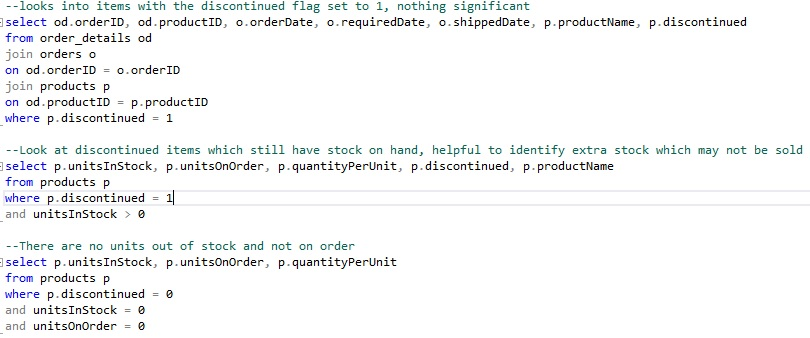

#### First Query resulted in no major findings, second query provided a list of items with extra stock
#### Third Query showed that no such items were out of stock that were not being ordered

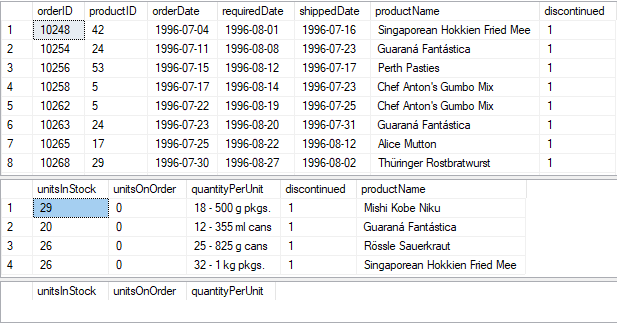

#### Started creating queries for dashboard, wanted to do a big join so that I could use names instead of ID's 

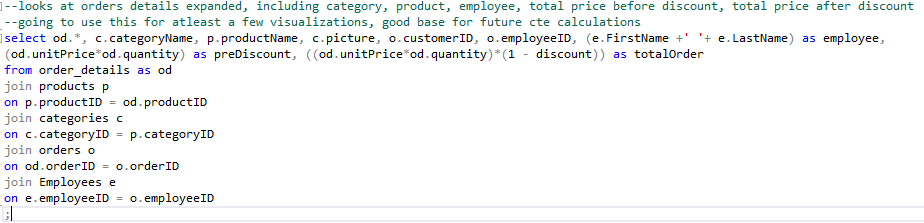

#### Used this query as a cte so I could do further calculations off of mostly total order value and employee full name

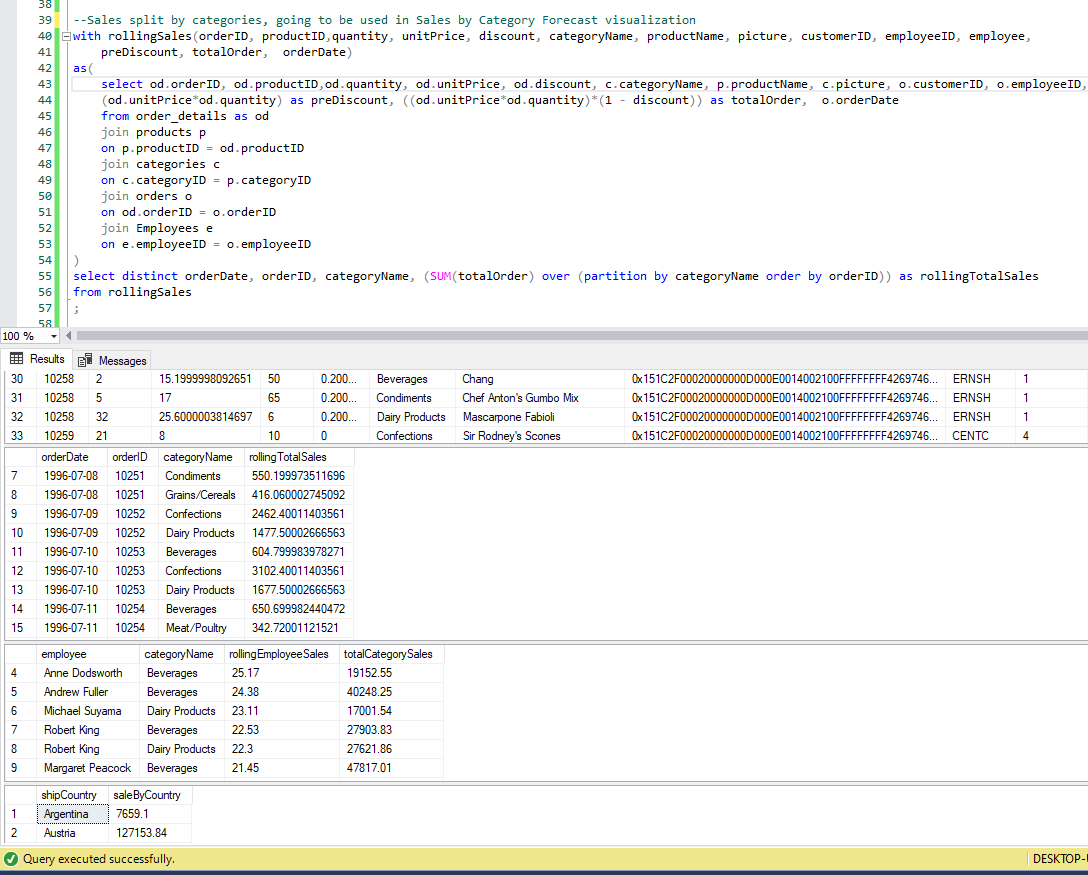

#### Made a few other queries, can be found in the attached sql file, sample of output can be found in picture above

#### Created Dashboard using data from the queries, came to a few conclusions

https://public.tableau.com/app/profile/ryan.bauer1690/viz/CompanyAssessmentDashboard/Dashboard1?publish=yes

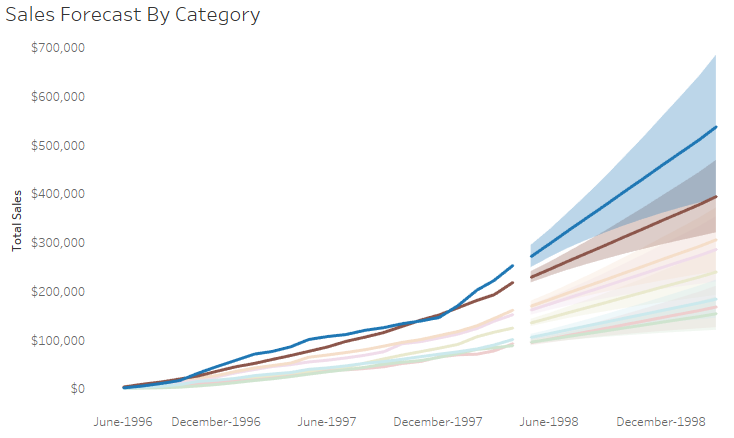

#### Beverages (blue) and Dairy Products (brown) make the company the most money and have the highest potential forecast
#### Going forward it could be worthwhile for the company to focus investment into these sectors

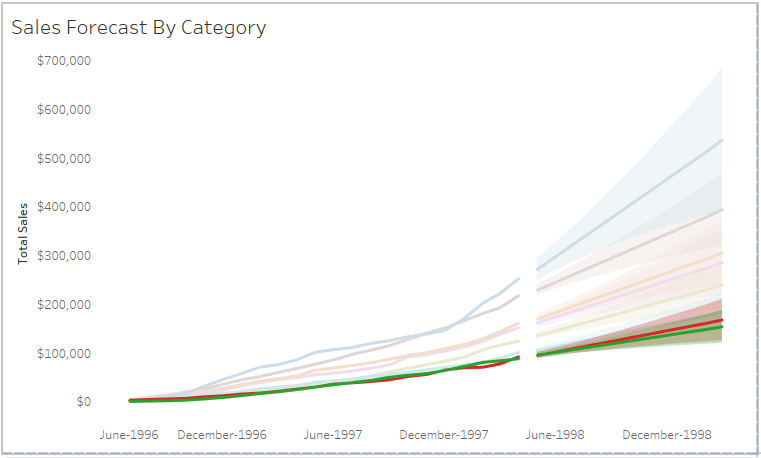

#### Produce (red) and Grains/Cereal (green) provide the least income for the company and do not forecast to improve
#### The company should consider either improving these areas or consider shifting attention to other areas

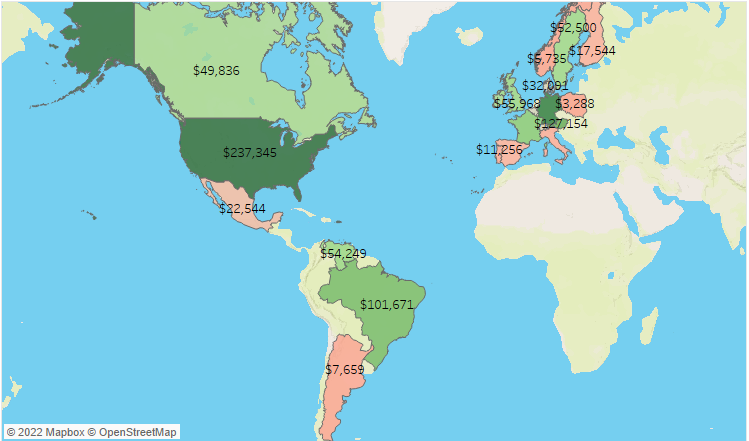

#### This map looks at sales on a global scale, depending on shipping costs and profit margins, it may not be worthwhile 
#### to continue business in the red areas on the map

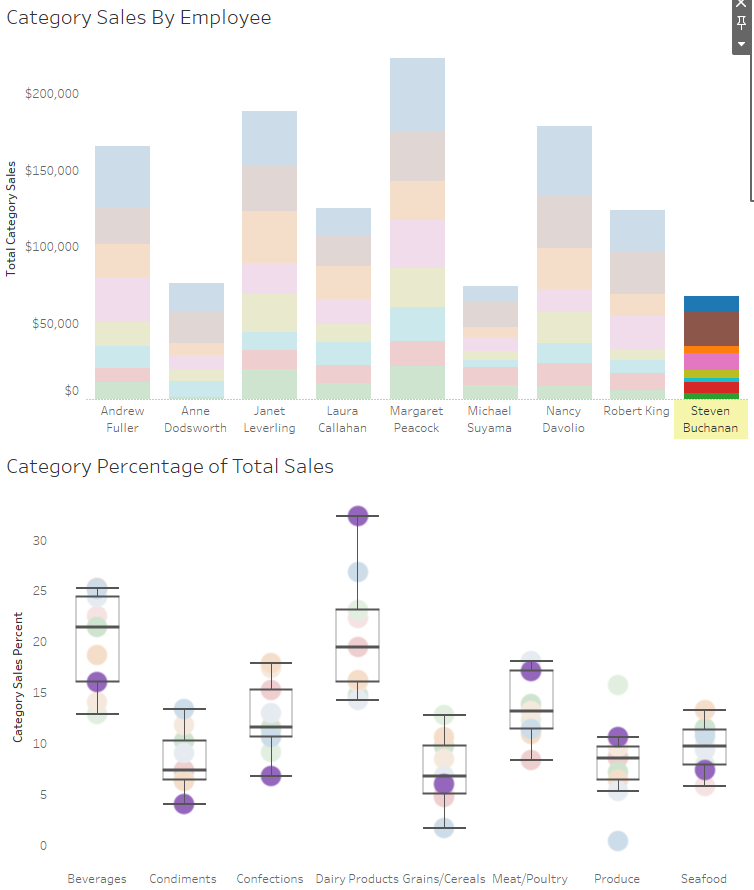

#### The bottom graph has each employees' percentage of sales by category in a box plot graph to help identify
#### each sales persons strengths and weakness to potentially help the company allocate sales contracts to the 
#### strongest sales person available, for example, if a contract has the potential to sell dairy, meat and produce
#### Steven Buchanan could prove to be a strong salesperson to assign to the job.

#### But if the contract involved the sales of condiments, confections and seafood, it could be a better idea to go with
#### a sales person who specializes in those areas instead of Steven